<a href="https://colab.research.google.com/github/houssem-karboul/digit-reorganization/blob/main/toxic_plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [67]:
(X,y)=make_blobs(n_samples=100,n_features=2,centers=2,random_state=0) #dataset with 100 lignes 2 variabe 
y=y.reshape(y.shape[0],1)
print("dimension  de X",X.shape)
print("dimension  de y",X.shape)

dimension  de X (100, 2)
dimension  de y (100, 2)


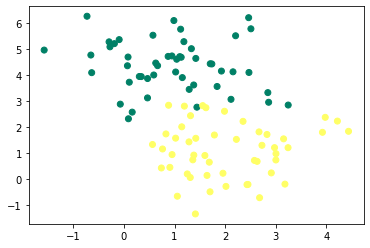

In [68]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.show()

In [69]:
def initialize(X):
  W=np.random.rand(X.shape[1],1)
  b=np.random.rand(1)
  return (W,b)




In [70]:
def model(X,W,b):
  Z=X.dot(W)+b
  A=1/(1+np.exp(-Z))
  return A

In [71]:
def log_loss(A,y):
  return 1/len(y) * np.sum(-y*np.log(A)-(1-y)*np.log2(1-A))


In [72]:
def gradient_descent(A,X,y):
  dw=(1/len(y))*np.dot(X.T,A-y)
  db=(1/len(y))*np.sum(A-y)
  return (dw,db)



In [73]:
def update(W,b,dw,db,learning_rate):
  W=W-learning_rate*dw
  b=b-learning_rate*db
  return (W,b)


In [74]:
def predict(X,W,b):
  A=model(X,W,b)
  return A>=0.5

In [75]:
def neurone(X,y,learning_rate=0.1,n_iter=100):
  W,b=initialize(X)
  loss=[] #empty list
  for i in range(n_iter):
      A = model(X,W,b)
      cost=log_loss(A,y)
      loss.append(cost)
      (dw,db)=gradient_descent(A,X,y)
      (W,b)=update(W,b,dw,db,learning_rate=0.1)
 
  y_pred=predict(X,W,b)
  print(accuracy_score(y,y_pred))
  plt.plot(loss)
  plt.show()
  return (W,b)



0.9


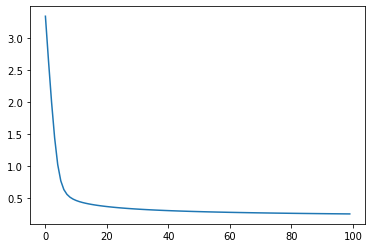

In [76]:
(W,b)=neurone(X,y)

In [77]:
W

array([[ 1.00475432],
       [-1.09117801]])

In [78]:
b

array([1.03745991])